# Diagramas de bloques

## Diagrama de bloques: concepto

Una forma esquemática de representar los sistemas de control es a través de los diagramas de bloques. En dicho diagrama identificamos los principales componentes como bloques, omitiendo detalles y mostrando la dirección principal de la información y la relación de causalidad entre componente y otro.

En la siguiente figura podemos ver el diagrama de bloques genérico del sistema de control realimentado.

:::{figure-md} diagrama-general

<img style="display:block; margin-left: auto; margin-right: auto;" src="fig1.png" alt="sistema de control general">

Diagrama de control general de sistema controlado
:::

Decimos que este sistema está realimentado, por que podemos ver que usamos la salida, que para este caso en particular es la medición de temperatura, para calcular y/o modificar la entrada al sistema. En este diagrama de bloques el resultado del sensor de salida se compara, mediante una resta con el sensor de la referencia.

### Ejemplo de sistema de control representado por diagrama de bloques

En la siguiente figura mostramos como ejemplo de diagrama de bloques el sistema de control de una caldera controlado por un termostato.

:::{figure-md} diagrama-termostato

<img style="display:block; margin-left: auto; margin-right: auto;" src="fig2.png" alt="sistema de control general">

Diagrama de control de temperatura
:::

## Diagramas de bloques como representación matemática

Los diagramas de bloques, no solo pueden ser conceptuales, sino que también pueden ser usados para representar matemáticamente los sistemas.

En un diagrama de bloques cada bloque del diagrama representa matemáticamente una parte del sistema, y las lineas son las señales de entrada y de salida de cada una de las partes del sistema. Así el sistema es dividido en subsistemas más pequeños y fáciles de resolver.

## Reducción de los diagramas de bloques usando algebra de bloques

Podemos encontrar diversos sistemas de control, representados con diagramas de bloques complejos. Dichos diagramas los podemos reducir a un simple bloque empleando las reglas del algebra de bloques.

A continuación demostraremos estas reglas mediante operaciones algebraicas y mediante el uso de Python.

El uso de Python para esto queda totalmente opcional para el alumno y no será calificado. En Python usaremos ``sympy``.

In [1]:
# opcionaL
import sympy as sp
sp.init_printing(use_latex=True)

### Bloques en serie

:::{figure-md} bloques-serie

<img style="display:block; margin-left: auto; margin-right: auto;" src="fig3.png" width="350" alt="Bloques en serie">

Bloques en serie
:::

$$ G(s) = \frac{Y(s)}{U(s)} = \frac{G2(s).X(s)}{U(s)} = \frac{G2(s).(G1(s).U(s))}{U(s)} = {G1(s).G2(s)} $$

In [2]:
# opcionaL
(U, X, Y, G1, G2) = sp.symbols('U, X, Y, G1, G2')
unknowns =  X, Y

eqs = [# Blocks
       X - G1*U,
       Y - G2*X]
sol = sp.solve(eqs, unknowns)
sol[Y]/U

### Bloques en paralelo

:::{figure-md} bloques-paralelo

<img style="display:block; margin-left: auto; margin-right: auto;" src="fig4.png" alt="Bloques en serie">

Bloques en paralelo

:::

$$ G = \frac{Y(s)}{U(s)} = \frac{X1(s)+X2(s)}{U(s)} = \frac{G1(s).U(s)+G2(s).U(s)}{U(s)} = \frac{(G1(s)+G2(s)).U(s)}{U(s)} = G1(s) + G2(s) $$

In [3]:
# opcionaL
(U, X1, X2, Y, G1, G2) = sp.symbols('U, X1, X2, Y, G1, G2')
unknowns =  X1, X2, Y

eqs = [# Bloques
       X1 - G1*U,
       X2 - G2*U,
    # Sumadores
        Y - (X1 + X2)]
sol = sp.solve(eqs, unknowns)
sol[Y]/U

### Sistema realimentado

$$X1(s)  = U(s) - X2(s) = U(s) - Y(s).G2(s) $$

$$Y(s) = X1(s).G1(s) = \left(U(s) - Y(s).G2(s)\right).G1(s) = U(s).G1(s) - Y(s).G2(s).G1(s)$$

$$Y.(1+G1(s).G2(s)) = U(s).G1(s)$$

$$G = \frac{Y(s)}{U(s)} =\frac{G1(s)}{(1+G1(s).G2(s))}$$

:::{figure-md} bloques-realimentados

<img  style="display:block; margin-left: auto; margin-right: auto;" alt="que es esto" src="fig5.png">

Bloques realimentados

:::

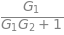

In [4]:
# opcionaL
eqs = [# Bloques
       X2 - G2*Y,
        Y - G1*X1,
    # Sumadores
        X1 - (U - X2)]
sol = sp.solve(eqs, unknowns)
sol[Y]/U

Tomando la realimentación positiva en vez de negativa resulta

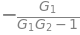

In [5]:
# opcionaL
eqs = [# Bloques
       X2 - G2*Y,
        Y - G1*X1,
    # Sumadores
        X1 - (U + X2)]
sol = sp.solve(eqs, unknowns)
sol[Y]/U

### Otras transformaciones útiles en el algebra de diagramas de bloque

:::{figure-md} transformaciones-bloques

<img style="display:block; margin-left: auto; margin-right: auto;" alt="transformaciones útiles" src="fig6.png">

Transformaciones útiles

::::

### Ejemplo de diagrama de bloques

Tenemos el diagrama de bloques de la figura, el cual queremos reducir.

:::{figure-md}

<img style="display:block; margin-left: auto; margin-right: auto;" alt="que es esto" src="fig7.png" >

Ejemplo de simplificación de diagrama de bloques

:::

#### Resolución a mano

En las siguientes dos figuras mostramos dos reducciones sucesivas al diagrama del ejemplo.

:::{figure-md} primer-paso

<img style="display:block; margin-left: auto; margin-right: auto;" alt="ejemplo para simplificar" src="fig8.png" >

Primer paso de simplificación

:::

:::{figure-md} segundo-paso

<img style="display:block; margin-left: auto; margin-right: auto;" alt="ejemplo para simplificar" src="fig9.png" >

Segundo paso de simplificación

:::

Finalmente, en la siguiente figura obtenemos la función de transferencia $G(s) = \dfrac{Y(s)}{R(s)}$:

$$ G(s) = \dfrac{Y(s)}{R(s)}=\dfrac{\dfrac{G_1.G_2}{1-G_1.G_3}}{1+\dfrac{G_1G_2G_4}{1-G_1G_3}}\left(G_5+\frac{G_6}{G_2}\right)$$
$$ G(s)=\dfrac{G_1G_2G_5+G_1G_6}{1-G_1G_3+G_1G_2G_4} $$

#### (opcional) Resolución con Python

Definimos un símbolo de `Sympy` por cada una de las señales y bloques que se encuentran en el sistema. Esto se hace de la siguiente manera

In [6]:
(R, G1s, G2s, G3s, G4s, G5s, G6s, 
S1s, S2s, G1, G2, G3, G4, G5, G6, Y) = sp.symbols('R, G1s, G2s, G3s, G4s, G5s,'
                                                 'G6s, S1s, S2s, G1, G2,G3, G4, G5, G6, Y')

Se definen las incógnitas del diagrama de bloques. Lo que se conoce del sistema son los bloques y las señales de entrada. Por lo tanto, lo que se desconoce, y se quiere averiguar, son las señales que no son entradas. Es decir:

In [7]:
unknowns =  G1s, G2s, G3s, G4s, G5s, G6s, S1s, S2s, Y

Finalmente tenemos que escribir las ecuaciones que vemos en el diagrama de bloques. Cada bloque define la señal de salida como producto de su transferencia por su entrada y cada sumador define su salida como suma o resta de sus entradas. Para el diagrama anterior se formulan las siguientes ecuaciones:

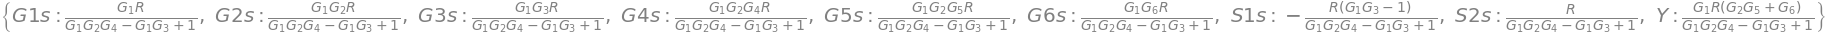

In [8]:
eqs = [# Blocks
       G1s - G1*S2s,
       G2s - G2*G1s,
       G6s - G6*G1s,
       G5s - G5*G2s,
       G4s - G4*G2s,
       G3s - G3*G1s,
       # Sums
       S2s - (S1s + G3s),
       S1s - (R - G4s),
       Y - (G6s + G5s),
       ]
sol = sp.solve(eqs, unknowns)
sol

Si queremos saber cuanto va a valer la salida un función de $R$ la obtenemos de la siguiente manera:

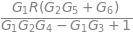

In [9]:
sol[Y].factor()

En cambio si queremos la función transferencia entre la salida $Y$ y la entrada $R$ podemos hacer:

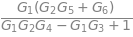

In [10]:
G=sol[Y]/R
G.factor()

También podemos obtener la transferencia entre dos señales cualesquiera del diagrama anterior. Por ejemplo podemos obtener la transferencia entre $Y$ y $S2s$.

Si queremos tener la función transferencia en $s$, debemos sustituir cada bloque por sus transferencia, (pongo valores cualquiera como funciones transferencias $G_1 \ldots G_6$:

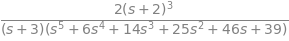

In [11]:
s=sp.symbols('s')
G=(sol[Y]/R).factor().subs([(G1,1/s),(G2,1/(s+1)),(G3,1/(s+2)**2),
                                     (G4,(s+10)/(s+1)),(G5,(1/(s+3))),
                             (G6,(1/(s**2+2*s+1)))])
G.factor()

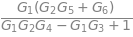

In [12]:
(sol[Y]/R).factor()